In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

#셀트리온

In [ ]:
data = pd.read_csv('/content/gdrive/Shareddrives/CS360/madcamp-3-week/data/strategy-3/셀트리온(2008~현재).csv', encoding = 'cp949', thousands = ',')
data

,일자,시가,고가,저가,종가,전일비,Unnamed: 6,등락률,거래량,금액(백만),신용비,개인,기관,외인(수량),외국계,프로그램,외인비
0,2022-07-15,189500,189500,183000,186500,▼,-2500,-1.32,389861.0,72255.0,0.81,18164,-86053,45779,57166,39338,20.63
1,2022-07-14,190000,190500,186500,189000,▼,-1000,-0.53,420165.0,79076.0,0.82,13421,-15809,-31578,38258,-78514,20.60
2,2022-07-13,188500,193000,187500,190000,▲,2500,1.33,513629.0,97775.0,0.83,-125090,92986,32324,47639,34758,20.62
3,2022-07-12,187500,191500,185000,187500,▲,1500,0.81,423296.0,79507.0,0.85,-53603,30983,21555,15032,13698,20.60
4,2022-07-11,181500,187500,181500,186000,▲,3500,1.92,344098.0,63851.0,0.83,-153713,61841,94447,62358,95288,20.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3590,2008-01-08,2850,2935,2830,2850,▼,-60,-2.06,19334.0,55.0,1.67,-2,0,0,0,0,0.04
3591,2008-01-07,2885,2940,2855,2910,▼,-55,-1.85,7664.0,22.0,1.68,-61,0,0,0,0,0.04
3592,2008-01-04,2945,2980,2870,2965,▲,45,1.54,14733.0,43.0,1.69,0,0,0,0,0,0.04
3593,2008-01-03,2945,2945,2910,2920,▼,-25,-0.85,7349.0,22.0,1.67,0,0,0,0,0,0.04


In [ ]:
data = data.loc[:, ['일자', '시가', '종가', '등락률']]
data

,일자,시가,종가,등락률
0,2022-07-15,189500,186500,-1.32
1,2022-07-14,190000,189000,-0.53
2,2022-07-13,188500,190000,1.33
3,2022-07-12,187500,187500,0.81
4,2022-07-11,181500,186000,1.92
...,...,...,...,...
3590,2008-01-08,2850,2850,-2.06
3591,2008-01-07,2885,2910,-1.85
3592,2008-01-04,2945,2965,1.54
3593,2008-01-03,2945,2920,-0.85


In [ ]:
data_copy = data.copy()
data_copy['일자'] = data_copy['일자'].map(lambda x: x[:4])
data_copy

,일자,시가,종가,등락률
0,2022,189500,186500,-1.32
1,2022,190000,189000,-0.53
2,2022,188500,190000,1.33
3,2022,187500,187500,0.81
4,2022,181500,186000,1.92
...,...,...,...,...
3590,2008,2850,2850,-2.06
3591,2008,2885,2910,-1.85
3592,2008,2945,2965,1.54
3593,2008,2945,2920,-0.85


In [ ]:
year_info = data_copy.groupby('일자')['일자'].count()
year_info = year_info[::-1]
year_info

일자
2022    132
2021    248
2020    248
2019    246
2018    244
2017    243
2016    246
2015    248
2014    245
2013    247
2012    248
2011    248
2010    251
2009    253
2008    248
Name: 일자, dtype: int64

In [ ]:
dataframe_by_year = []
data_fragement = data.copy()

for dates in year_info:
  ret = data_fragement[:dates].iloc[1:3]
  after_div_day = ret.iloc[:1]
  before_div_day = ret.iloc[1:]
  after_div_day.columns = ['대주주기준일-1', '시가(Day-1)', '종가(Day-1)', '등락률(Day-1)']
  before_div_day.columns = ['대주주기준일-2', '시가(Day-2)', '종가(Day-2)', '등락률(Day-2)']
  after_div_day.index = before_div_day.index
  ret = pd.concat([before_div_day, after_div_day], axis = 1)
  dataframe_by_year.append(ret)

  data_fragement = data_fragement[dates:]

dataframe_by_year = dataframe_by_year[1:]
ret = pd.concat(dataframe_by_year)
ret.index = range(len(ret.index))

In [ ]:
ret

,대주주기준일-2,시가(Day-2),종가(Day-2),등락률(Day-2),대주주기준일-1,시가(Day-1),종가(Day-1),등락률(Day-1)
0,2021-12-28,204500,216000,5.88,2021-12-29,207500,201000,-5.19
1,2020-12-28,349500,333500,-4.03,2020-12-29,360500,360500,10.08
2,2019-12-26,187000,189500,2.43,2019-12-27,183000,184000,1.66
3,2018-12-26,204000,228000,8.31,2018-12-27,241500,223000,-0.45
4,2017-12-26,204200,195000,-3.42,2017-12-27,210000,220000,15.06
5,2016-12-27,106700,106300,0.19,2016-12-28,107500,106500,5.13
6,2015-12-28,77900,76700,-2.54,2015-12-29,79700,84000,12.75
7,2014-12-26,40000,39450,-0.63,2014-12-29,38600,38750,3.06
8,2013-12-26,38900,38050,-1.55,2013-12-27,37500,38200,3.24
9,2012-12-26,29300,28600,-1.72,2012-12-27,25700,26000,4.21


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
ret_day_minus_2=ret.loc[::-1, ['대주주기준일-2',	'등락률(Day-2)']]
ret_day_minus_1=ret.loc[::-1, ['대주주기준일-1',	'등락률(Day-1)']]

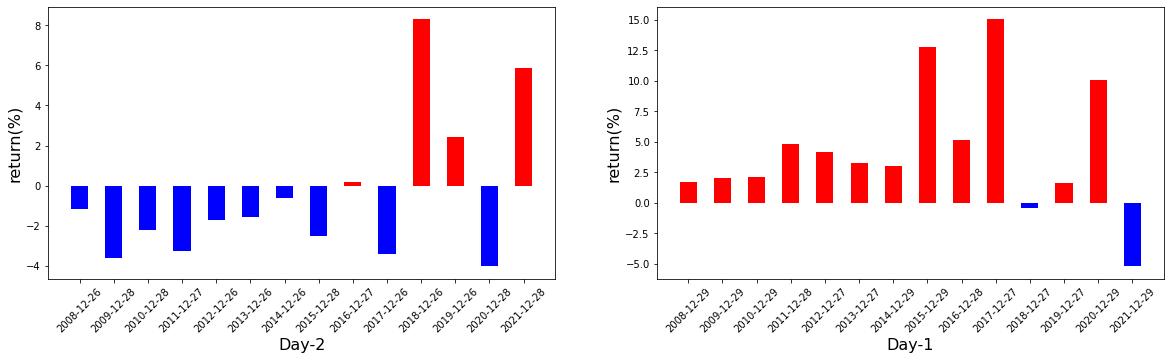

In [ ]:
label = ret_day_minus_2['대주주기준일-2']
index = np.arange(len(label))

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
plt.bar(index, ret_day_minus_2['등락률(Day-2)'], width = 0.5, color=[  'red' if x_return > 0 else 'blue' for x_return in list(ret_day_minus_2['등락률(Day-2)']) ] )
plt.ylabel('return(%)', fontsize = 16)
plt.xlabel('Day-2', fontsize = 16)
plt.xticks(index, label, fontsize = 10, rotation = 45)

label = ret_day_minus_1['대주주기준일-1']
index = np.arange(len(label))

plt.subplot(1,2,2)
plt.bar(index, ret_day_minus_1['등락률(Day-1)'], width = 0.5, color=[ 'red' if x_return > 0 else 'blue' for x_return in list(ret_day_minus_1['등락률(Day-1)']) ])
plt.ylabel('return(%)', fontsize = 16)
plt.xlabel('Day-1', fontsize = 16)
plt.xticks(index, label, fontsize = 10, rotation = 45)
plt.show()

# KODEX 코스닥 150

In [ ]:
data = pd.read_csv('/content/gdrive/Shareddrives/CS360/madcamp-3-week/data/strategy-3/KODEX_코스닥_150(2016~현재).csv', encoding = 'cp949', thousands = ',')
data

,일자,시가,고가,저가,종가,전일비,Unnamed: 6,등락률,거래량,금액(백만),신용비,개인,기관,외인(수량),외국계,프로그램,외인비
0,2022-07-18,11015.0,11075.0,10850.0,11010.0,▲,150.0,1.38,7961398.0,87649.0,0.00,306846.0,-268938.0,-38881.0,0.0,0.0,0.73
1,2022-07-15,10955.0,10965.0,10735.0,10860.0,▼,-5.0,-0.05,6584636.0,71633.0,1.82,121553.0,-113722.0,-10905.0,0.0,0.0,0.81
2,2022-07-14,10840.0,10975.0,10795.0,10865.0,▼,-40.0,-0.37,6613272.0,72081.0,1.94,77122.0,-56415.0,52721.0,1.0,0.0,0.84
3,2022-07-13,10615.0,10905.0,10590.0,10905.0,▲,315.0,2.97,6165852.0,66931.0,1.76,-386256.0,414111.0,-69154.0,0.0,0.0,0.75
4,2022-07-12,10710.0,10745.0,10555.0,10590.0,▼,-235.0,-2.17,5700546.0,60749.0,2.07,289603.0,-337076.0,-12281.0,0.0,0.0,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data = data.dropna()
data

,일자,시가,고가,저가,종가,전일비,Unnamed: 6,등락률,거래량,금액(백만),신용비,개인,기관,외인(수량),외국계,프로그램,외인비
0,2022-07-18,11015.0,11075.0,10850.0,11010.0,▲,150.0,1.38,7961398.0,87649.0,0.00,306846.0,-268938.0,-38881.0,0.0,0.0,0.73
1,2022-07-15,10955.0,10965.0,10735.0,10860.0,▼,-5.0,-0.05,6584636.0,71633.0,1.82,121553.0,-113722.0,-10905.0,0.0,0.0,0.81
2,2022-07-14,10840.0,10975.0,10795.0,10865.0,▼,-40.0,-0.37,6613272.0,72081.0,1.94,77122.0,-56415.0,52721.0,1.0,0.0,0.84
3,2022-07-13,10615.0,10905.0,10590.0,10905.0,▲,315.0,2.97,6165852.0,66931.0,1.76,-386256.0,414111.0,-69154.0,0.0,0.0,0.75
4,2022-07-12,10710.0,10745.0,10555.0,10590.0,▼,-235.0,-2.17,5700546.0,60749.0,2.07,289603.0,-337076.0,-12281.0,0.0,0.0,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,2016-01-08,10800.0,11120.0,10750.0,11050.0,▲,25.0,0.23,3667733.0,40473.0,0.00,188.0,-188.0,0.0,0.0,0.0,0.00
1604,2016-01-07,11080.0,11200.0,10915.0,11025.0,▼,-125.0,-1.12,853205.0,9452.0,0.00,-48806.0,48806.0,0.0,0.0,0.0,0.00
1605,2016-01-06,11065.0,11150.0,10910.0,11150.0,▲,100.0,0.90,545702.0,6048.0,0.00,-1404.0,1404.0,0.0,0.0,0.0,0.00
1606,2016-01-05,10775.0,11050.0,10725.0,11050.0,▲,110.0,1.01,882234.0,9665.0,0.03,-3062.0,3062.0,0.0,0.0,0.0,0.00


In [ ]:
data = data.loc[:, ['일자', '시가', '종가', '등락률']]
data

,일자,시가,종가,등락률
0,2022-07-18,11015.0,11010.0,1.38
1,2022-07-15,10955.0,10860.0,-0.05
2,2022-07-14,10840.0,10865.0,-0.37
3,2022-07-13,10615.0,10905.0,2.97
4,2022-07-12,10710.0,10590.0,-2.17
...,...,...,...,...
1603,2016-01-08,10800.0,11050.0,0.23
1604,2016-01-07,11080.0,11025.0,-1.12
1605,2016-01-06,11065.0,11150.0,0.90
1606,2016-01-05,10775.0,11050.0,1.01


In [ ]:
data_copy = data.copy()
data_copy['일자'] = data_copy['일자'].map(lambda x: x[:4])
data_copy

,일자,시가,종가,등락률
0,2022,11015.0,11010.0,1.38
1,2022,10955.0,10860.0,-0.05
2,2022,10840.0,10865.0,-0.37
3,2022,10615.0,10905.0,2.97
4,2022,10710.0,10590.0,-2.17
...,...,...,...,...
1603,2016,10800.0,11050.0,0.23
1604,2016,11080.0,11025.0,-1.12
1605,2016,11065.0,11150.0,0.90
1606,2016,10775.0,11050.0,1.01


In [ ]:
year_info = data_copy.groupby('일자')['일자'].count()
year_info = year_info[::-1]
year_info

일자
2022    133
2021    248
2020    248
2019    246
2018    244
2017    243
2016    246
Name: 일자, dtype: int64

In [ ]:
dataframe_by_year = []
data_fragement = data.copy()

for dates in year_info:
  ret = data_fragement[:dates].iloc[1:3]
  after_div_day = ret.iloc[:1]
  before_div_day = ret.iloc[1:]
  after_div_day.columns = ['대주주기준일-1', '시가(Day-1)', '종가(Day-1)', '등락률(Day-1)']
  before_div_day.columns = ['대주주기준일-2', '시가(Day-2)', '종가(Day-2)', '등락률(Day-2)']
  after_div_day.index = before_div_day.index
  ret = pd.concat([before_div_day, after_div_day], axis = 1)
  dataframe_by_year.append(ret)

  data_fragement = data_fragement[dates:]

dataframe_by_year = dataframe_by_year[1:]
ret = pd.concat(dataframe_by_year)
ret.index = range(len(ret.index))

In [ ]:
ret

,대주주기준일-2,시가(Day-2),종가(Day-2),등락률(Day-2),대주주기준일-1,시가(Day-1),종가(Day-1),등락률(Day-1)
0,2021-12-28,15195.0,15415.0,3.28,2021-12-29,15405.0,15095.0,-2.08
1,2020-12-28,14955.0,15115.0,1.92,2020-12-29,15195.0,15490.0,2.48
2,2019-12-26,9830.0,10070.0,2.76,2019-12-27,10075.0,10250.0,1.79
3,2018-12-26,11475.0,11820.0,1.24,2018-12-27,12180.0,11750.0,-0.59
4,2017-12-26,13310.0,13380.0,0.60,2017-12-27,13800.0,14105.0,5.42
5,2016-12-27,9045.0,9130.0,0.61,2016-12-28,9235.0,9315.0,2.03


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
ret_day_minus_2=ret.loc[::-1, ['대주주기준일-2',	'등락률(Day-2)']]
ret_day_minus_1=ret.loc[::-1, ['대주주기준일-1',	'등락률(Day-1)']]

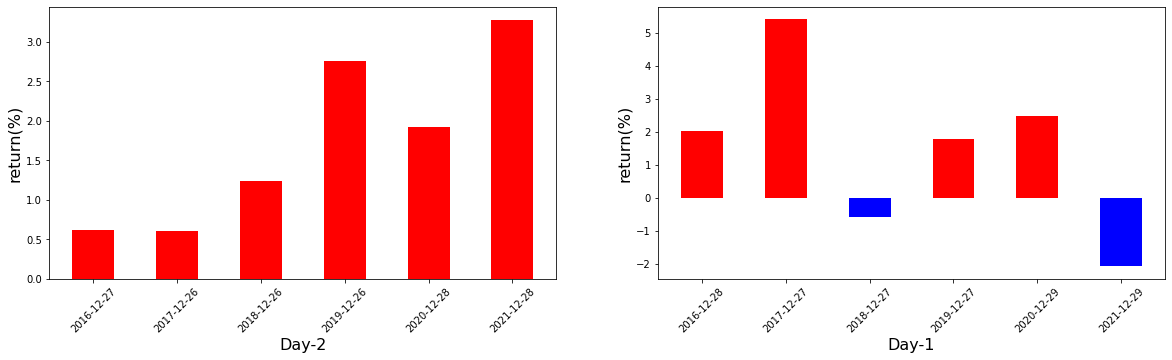

In [ ]:
label = ret_day_minus_2['대주주기준일-2']
index = np.arange(len(label))

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
plt.bar(index, ret_day_minus_2['등락률(Day-2)'], width = 0.5, color=[  'red' if x_return > 0 else 'blue' for x_return in list(ret_day_minus_2['등락률(Day-2)']) ] )
plt.ylabel('return(%)', fontsize = 16)
plt.xlabel('Day-2', fontsize = 16)
plt.xticks(index, label, fontsize = 10, rotation = 45)

label = ret_day_minus_1['대주주기준일-1']
index = np.arange(len(label))

plt.subplot(1,2,2)
plt.bar(index, ret_day_minus_1['등락률(Day-1)'], width = 0.5, color=[ 'red' if x_return > 0 else 'blue' for x_return in list(ret_day_minus_1['등락률(Day-1)']) ])
plt.ylabel('return(%)', fontsize = 16)
plt.xlabel('Day-1', fontsize = 16)
plt.xticks(index, label, fontsize = 10, rotation = 45)
plt.show()

#카카오

In [ ]:
data = pd.read_csv('/content/gdrive/Shareddrives/CS360/madcamp-3-week/data/strategy-3/카카오(2013~현재).csv', encoding = 'cp949', thousands = ',')
data = data.dropna()
data

,일자,시가,고가,저가,종가,전일비,Unnamed: 6,등락률,거래량,금액(백만),신용비,개인,기관,외인(수량),외국계,프로그램,외인비
0,2022-07-18,71100.0,73200.0,70600.0,72800.0,▲,2700.0,3.85,1669517.0,120612.0,0.00,-394158.0,293242.0,0.0,-1132.0,176923.0,28.80
1,2022-07-15,72100.0,72200.0,69400.0,70100.0,▼,-2000.0,-2.77,1605289.0,112792.0,0.56,522053.0,-168410.0,-336970.0,-79611.0,-196389.0,28.80
2,2022-07-14,71000.0,73400.0,70400.0,72100.0,▲,200.0,0.28,1597400.0,114770.0,0.55,-117969.0,216344.0,-125837.0,-17818.0,-184341.0,28.87
3,2022-07-13,70100.0,72200.0,70100.0,71900.0,▲,1600.0,2.28,1156844.0,82679.0,0.55,-248264.0,260471.0,-39484.0,-18877.0,53078.0,28.90
4,2022-07-12,70700.0,71000.0,69400.0,70300.0,▼,-1000.0,-1.40,1082539.0,75753.0,0.55,34316.0,-175518.0,140111.0,107057.0,114050.0,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2343,2013-01-08,102100.0,103700.0,101500.0,103000.0,▼,-700.0,-0.68,155050.0,15888.0,0.49,-12787.0,-84458.0,98800.0,65574.0,-9372.0,50.53
2344,2013-01-07,101900.0,104200.0,99900.0,103700.0,▲,3800.0,3.80,277976.0,28538.0,0.67,-55927.0,-109140.0,167053.0,127838.0,3692.0,49.80
2345,2013-01-04,94600.0,100500.0,94000.0,99900.0,▲,6200.0,6.62,263981.0,25978.0,0.73,-110555.0,21664.0,88886.0,87037.0,5209.0,48.56
2346,2013-01-03,94300.0,94500.0,92500.0,93700.0,▲,400.0,0.43,81956.0,7693.0,0.80,-26128.0,20523.0,2097.0,7566.0,-2032.0,47.90


In [ ]:
data = data.loc[:, ['일자', '시가', '종가', '등락률']]
data

,일자,시가,종가,등락률
0,2022-07-18,71100.0,72800.0,3.85
1,2022-07-15,72100.0,70100.0,-2.77
2,2022-07-14,71000.0,72100.0,0.28
3,2022-07-13,70100.0,71900.0,2.28
4,2022-07-12,70700.0,70300.0,-1.40
...,...,...,...,...
2343,2013-01-08,102100.0,103000.0,-0.68
2344,2013-01-07,101900.0,103700.0,3.80
2345,2013-01-04,94600.0,99900.0,6.62
2346,2013-01-03,94300.0,93700.0,0.43


In [ ]:
data_copy = data.copy()
data_copy['일자'] = data_copy['일자'].map(lambda x: x[:4])
data_copy

,일자,시가,종가,등락률
0,2022,71100.0,72800.0,3.85
1,2022,72100.0,70100.0,-2.77
2,2022,71000.0,72100.0,0.28
3,2022,70100.0,71900.0,2.28
4,2022,70700.0,70300.0,-1.40
...,...,...,...,...
2343,2013,102100.0,103000.0,-0.68
2344,2013,101900.0,103700.0,3.80
2345,2013,94600.0,99900.0,6.62
2346,2013,94300.0,93700.0,0.43


In [ ]:
year_info = data_copy.groupby('일자')['일자'].count()
year_info = year_info[::-1]
year_info

일자
2022    133
2021    245
2020    248
2019    246
2018    244
2017    243
2016    246
2015    248
2014    244
2013    247
Name: 일자, dtype: int64

In [ ]:
dataframe_by_year = []
data_fragement = data.copy()

for dates in year_info:
  ret = data_fragement[:dates].iloc[1:3]
  after_div_day = ret.iloc[:1]
  before_div_day = ret.iloc[1:]
  after_div_day.columns = ['대주주기준일-1', '시가(Day-1)', '종가(Day-1)', '등락률(Day-1)']
  before_div_day.columns = ['대주주기준일-2', '시가(Day-2)', '종가(Day-2)', '등락률(Day-2)']
  after_div_day.index = before_div_day.index
  ret = pd.concat([before_div_day, after_div_day], axis = 1)
  dataframe_by_year.append(ret)

  data_fragement = data_fragement[dates:]

dataframe_by_year = dataframe_by_year[1:]
ret = pd.concat(dataframe_by_year)
ret.index = range(len(ret.index))

In [ ]:
ret

,대주주기준일-2,시가(Day-2),종가(Day-2),등락률(Day-2),대주주기준일-1,시가(Day-1),종가(Day-1),등락률(Day-1)
0,2021-12-28,113000.0,113500.0,0.44,2021-12-29,115500.0,114000.0,0.44
1,2020-12-28,374500.0,373000.0,-0.27,2020-12-29,381000.0,384500.0,3.08
2,2019-12-26,146000.0,148000.0,1.02,2019-12-27,149500.0,153500.0,3.72
3,2018-12-26,99000.0,98500.0,-2.48,2018-12-27,100500.0,101500.0,3.05
4,2017-12-26,130500.0,126000.0,-2.70,2017-12-27,130000.0,139500.0,10.71
5,2016-12-27,75500.0,74800.0,-0.40,2016-12-28,75000.0,75500.0,0.94
6,2015-12-28,112100.0,110600.0,0.00,2015-12-29,111500.0,113400.0,2.53
7,2014-12-26,123200.0,122000.0,-1.05,2014-12-29,123200.0,123100.0,0.90
8,2013-12-26,87500.0,85600.0,-2.17,2013-12-27,85600.0,85200.0,-0.47


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
ret_day_minus_2=ret.loc[::-1, ['대주주기준일-2',	'등락률(Day-2)']]
ret_day_minus_1=ret.loc[::-1, ['대주주기준일-1',	'등락률(Day-1)']]

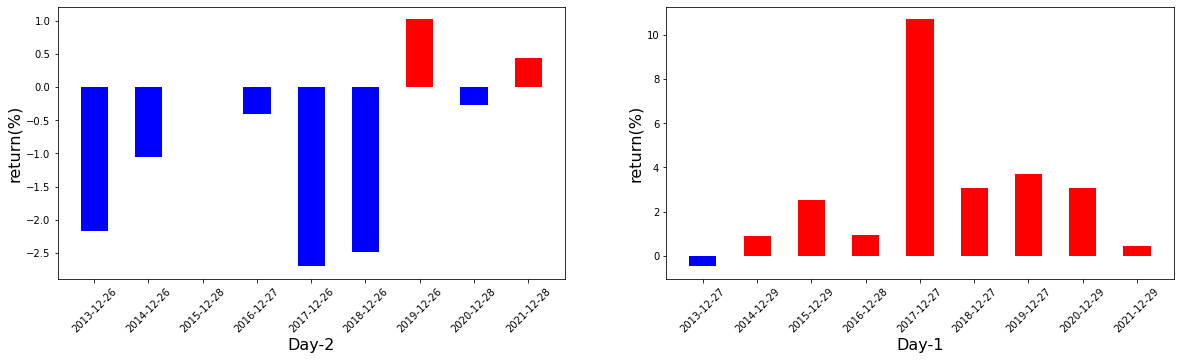

In [ ]:
label = ret_day_minus_2['대주주기준일-2']
index = np.arange(len(label))

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
plt.bar(index, ret_day_minus_2['등락률(Day-2)'], width = 0.5, color=[  'red' if x_return > 0 else 'blue' for x_return in list(ret_day_minus_2['등락률(Day-2)']) ] )
plt.ylabel('return(%)', fontsize = 16)
plt.xlabel('Day-2', fontsize = 16)
plt.xticks(index, label, fontsize = 10, rotation = 45)

label = ret_day_minus_1['대주주기준일-1']
index = np.arange(len(label))

plt.subplot(1,2,2)
plt.bar(index, ret_day_minus_1['등락률(Day-1)'], width = 0.5, color=[ 'red' if x_return > 0 else 'blue' for x_return in list(ret_day_minus_1['등락률(Day-1)']) ])
plt.ylabel('return(%)', fontsize = 16)
plt.xlabel('Day-1', fontsize = 16)
plt.xticks(index, label, fontsize = 10, rotation = 45)
plt.show()

#NAVER

In [ ]:
data = pd.read_csv('/content/gdrive/Shareddrives/CS360/madcamp-3-week/data/strategy-3/네이버(2011~현재).csv', encoding = 'cp949', thousands = ',')
data = data.dropna()
data

,일자,시가,고가,저가,종가,전일비,Unnamed: 6,등락률,거래량,금액(백만),신용비,개인,기관,외인(수량),외국계,프로그램,외인비
0,2022-07-18,234000.0,247000.0,233000.0,246500.0,▲,15500.0,6.71,985176.0,238978.0,0.00,-260830.0,18129.0,0.0,279672.0,176070.0,53.25
1,2022-07-15,234500.0,234500.0,228000.0,231000.0,▼,-2500.0,-1.07,826920.0,190631.0,0.29,152301.0,-11277.0,-219311.0,-143998.0,195328.0,53.25
2,2022-07-14,232000.0,236000.0,231000.0,233500.0,▼,-4000.0,-1.68,611226.0,142584.0,0.30,98708.0,-138771.0,30604.0,46377.0,39876.0,53.39
3,2022-07-13,232000.0,239000.0,232000.0,237500.0,▲,4000.0,1.71,451619.0,106835.0,0.28,-69621.0,98510.0,-14349.0,-49253.0,530.0,53.37
4,2022-07-12,236500.0,237500.0,230500.0,233500.0,▼,-7000.0,-2.91,601679.0,139981.0,0.28,117453.0,-22253.0,-132849.0,-62460.0,36603.0,53.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2839,2011-01-07,221500.0,227500.0,221500.0,225000.0,▲,3500.0,1.58,202713.0,45700.0,0.16,-18960.0,16780.0,-8244.0,15246.0,10050.0,66.36
2840,2011-01-06,224500.0,225500.0,219500.0,221500.0,▼,-1000.0,-0.45,191166.0,42411.0,0.16,-7800.0,630.0,4553.0,347.0,-519.0,66.37
2841,2011-01-05,219000.0,227500.0,219000.0,222500.0,▲,1000.0,0.45,187526.0,42102.0,0.12,-14708.0,10743.0,-7780.0,-8861.0,20198.0,66.36
2842,2011-01-04,223500.0,225500.0,217000.0,221500.0,,0.0,0.00,152706.0,33546.0,0.12,23596.0,-771.0,-13957.0,-21136.0,-6219.0,66.38


In [ ]:
data = data.loc[:, ['일자', '시가', '종가', '등락률']]
data

,일자,시가,종가,등락률
0,2022-07-18,234000.0,246500.0,6.71
1,2022-07-15,234500.0,231000.0,-1.07
2,2022-07-14,232000.0,233500.0,-1.68
3,2022-07-13,232000.0,237500.0,1.71
4,2022-07-12,236500.0,233500.0,-2.91
...,...,...,...,...
2839,2011-01-07,221500.0,225000.0,1.58
2840,2011-01-06,224500.0,221500.0,-0.45
2841,2011-01-05,219000.0,222500.0,0.45
2842,2011-01-04,223500.0,221500.0,0.00


In [ ]:
data_copy = data.copy()
data_copy['일자'] = data_copy['일자'].map(lambda x: x[:4])
data_copy

,일자,시가,종가,등락률
0,2022,234000.0,246500.0,6.71
1,2022,234500.0,231000.0,-1.07
2,2022,232000.0,233500.0,-1.68
3,2022,232000.0,237500.0,1.71
4,2022,236500.0,233500.0,-2.91
...,...,...,...,...
2839,2011,221500.0,225000.0,1.58
2840,2011,224500.0,221500.0,-0.45
2841,2011,219000.0,222500.0,0.45
2842,2011,223500.0,221500.0,0.00


In [ ]:
year_info = data_copy.groupby('일자')['일자'].count()
year_info = year_info[::-1]
year_info

일자
2022    133
2021    248
2020    248
2019    246
2018    241
2017    243
2016    246
2015    248
2014    245
2013    226
2012    248
2011    248
Name: 일자, dtype: int64

In [ ]:
dataframe_by_year = []
data_fragement = data.copy()

for dates in year_info:
  ret = data_fragement[:dates].iloc[1:3]
  after_div_day = ret.iloc[:1]
  before_div_day = ret.iloc[1:]
  after_div_day.columns = ['대주주기준일-1', '시가(Day-1)', '종가(Day-1)', '등락률(Day-1)']
  before_div_day.columns = ['대주주기준일-2', '시가(Day-2)', '종가(Day-2)', '등락률(Day-2)']
  after_div_day.index = before_div_day.index
  ret = pd.concat([before_div_day, after_div_day], axis = 1)
  dataframe_by_year.append(ret)

  data_fragement = data_fragement[dates:]

dataframe_by_year = dataframe_by_year[1:]
ret = pd.concat(dataframe_by_year)
ret.index = range(len(ret.index))

In [ ]:
ret

,대주주기준일-2,시가(Day-2),종가(Day-2),등락률(Day-2),대주주기준일-1,시가(Day-1),종가(Day-1),등락률(Day-1)
0,2021-12-28,380000.0,384500.0,1.05,2021-12-29,389000.0,382000.0,-0.65
1,2020-12-28,282000.0,281000.0,-0.35,2020-12-29,281500.0,283000.0,0.71
2,2019-12-26,181500.0,180500.0,-0.82,2019-12-27,182000.0,183500.0,1.66
3,2018-12-26,121000.0,119000.0,-3.25,2018-12-27,120500.0,122500.0,2.94
4,2017-12-26,865000.0,874000.0,1.39,2017-12-27,872000.0,877000.0,0.34
5,2016-12-27,766000.0,772000.0,0.92,2016-12-28,785000.0,763000.0,-1.17
6,2015-12-28,647000.0,641000.0,-0.93,2015-12-29,649000.0,642000.0,0.16
7,2014-12-26,733000.0,736000.0,-0.67,2014-12-29,728000.0,723000.0,-1.77
8,2013-12-26,734000.0,714000.0,-2.72,2013-12-27,723000.0,734000.0,2.80
9,2012-12-26,233000.0,226000.0,-1.74,2012-12-27,226000.0,225000.0,-0.44


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
ret_day_minus_2=ret.loc[::-1, ['대주주기준일-2',	'등락률(Day-2)']]
ret_day_minus_1=ret.loc[::-1, ['대주주기준일-1',	'등락률(Day-1)']]

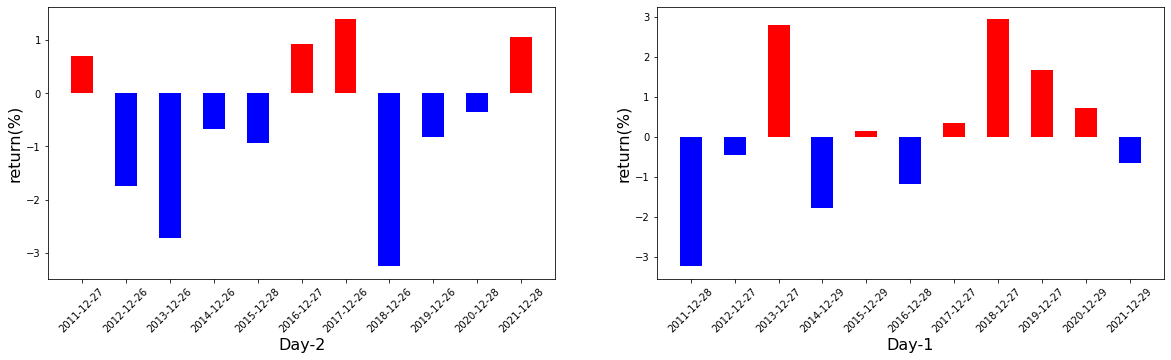

In [ ]:
label = ret_day_minus_2['대주주기준일-2']
index = np.arange(len(label))

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
plt.bar(index, ret_day_minus_2['등락률(Day-2)'], width = 0.5, color=[  'red' if x_return > 0 else 'blue' for x_return in list(ret_day_minus_2['등락률(Day-2)']) ] )
plt.ylabel('return(%)', fontsize = 16)
plt.xlabel('Day-2', fontsize = 16)
plt.xticks(index, label, fontsize = 10, rotation = 45)

label = ret_day_minus_1['대주주기준일-1']
index = np.arange(len(label))

plt.subplot(1,2,2)
plt.bar(index, ret_day_minus_1['등락률(Day-1)'], width = 0.5, color=[ 'red' if x_return > 0 else 'blue' for x_return in list(ret_day_minus_1['등락률(Day-1)']) ])
plt.ylabel('return(%)', fontsize = 16)
plt.xlabel('Day-1', fontsize = 16)
plt.xticks(index, label, fontsize = 10, rotation = 45)
plt.show()

#삼성전자

In [ ]:
data = pd.read_csv('/content/gdrive/Shareddrives/CS360/madcamp-3-week/data/strategy-3/삼성전자(2000~현재).csv', encoding = 'cp949', thousands = ',')
data = data.dropna()
data

,일자,시가,고가,저가,종가,전일비,Unnamed: 6,등락률,거래량,금액(백만),신용비,개인,기관,외인(수량),외국계,프로그램,외인비
0,2022-07-18,60600.0,62000.0,60500.0,61900.0,▲,1900.0,3.17,20832517.0,1277727.0,0.00,-2118292.0,-1243492.0,3587045.0,5281378.0,570459.0,49.80
1,2022-07-15,58400.0,60000.0,58100.0,60000.0,▲,2500.0,4.35,18685583.0,1104045.0,0.17,-4467156.0,-908681.0,5277292.0,4909988.0,1679992.0,49.74
2,2022-07-14,57500.0,58200.0,57400.0,57500.0,▼,-500.0,-0.86,15067012.0,869131.0,0.17,1221298.0,-4061258.0,2642802.0,2402687.0,2103427.0,49.65
3,2022-07-13,58300.0,58600.0,58000.0,58000.0,▼,-100.0,-0.17,10841315.0,631712.0,0.17,457539.0,1628232.0,-1883354.0,-2153510.0,-675926.0,49.61
4,2022-07-12,58600.0,58700.0,58100.0,58100.0,▼,-700.0,-1.19,9336061.0,544403.0,0.17,139534.0,-194812.0,66179.0,57400.0,478026.0,49.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5560,2000-01-10,280000.0,288500.0,279000.0,288500.0,▲,11500.0,4.15,937615.0,265754.0,0.55,0.0,0.0,0.0,0.0,0.0,0.00
5561,2000-01-07,278000.0,283500.0,268000.0,277000.0,▼,-4000.0,-1.42,806195.0,222718.0,0.55,0.0,0.0,0.0,0.0,0.0,0.00
5562,2000-01-06,287500.0,289000.0,279000.0,281000.0,▲,2000.0,0.72,1087810.0,308005.0,0.58,0.0,0.0,0.0,0.0,0.0,0.00
5563,2000-01-05,290000.0,303000.0,276000.0,279000.0,▼,-26500.0,-8.67,1493604.0,433783.0,0.57,0.0,0.0,0.0,0.0,0.0,0.00


In [ ]:
data = data.loc[:, ['일자', '시가', '종가', '등락률']]
data

,일자,시가,종가,등락률
0,2022-07-18,60600.0,61900.0,3.17
1,2022-07-15,58400.0,60000.0,4.35
2,2022-07-14,57500.0,57500.0,-0.86
3,2022-07-13,58300.0,58000.0,-0.17
4,2022-07-12,58600.0,58100.0,-1.19
...,...,...,...,...
5560,2000-01-10,280000.0,288500.0,4.15
5561,2000-01-07,278000.0,277000.0,-1.42
5562,2000-01-06,287500.0,281000.0,0.72
5563,2000-01-05,290000.0,279000.0,-8.67


In [ ]:
data_copy = data.copy()
data_copy['일자'] = data_copy['일자'].map(lambda x: x[:4])
data_copy

,일자,시가,종가,등락률
0,2022,60600.0,61900.0,3.17
1,2022,58400.0,60000.0,4.35
2,2022,57500.0,57500.0,-0.86
3,2022,58300.0,58000.0,-0.17
4,2022,58600.0,58100.0,-1.19
...,...,...,...,...
5560,2000,280000.0,288500.0,4.15
5561,2000,278000.0,277000.0,-1.42
5562,2000,287500.0,281000.0,0.72
5563,2000,290000.0,279000.0,-8.67


In [ ]:
year_info = data_copy.groupby('일자')['일자'].count()
year_info = year_info[::-1]
year_info

일자
2022    133
2021    248
2020    248
2019    246
2018    241
2017    243
2016    246
2015    248
2014    245
2013    247
2012    248
2011    248
2010    251
2009    253
2008    248
2007    246
2006    247
2005    249
2004    249
2003    247
2002    244
2001    246
2000    241
Name: 일자, dtype: int64

In [ ]:
dataframe_by_year = []
data_fragement = data.copy()

for dates in year_info:
  ret = data_fragement[:dates].iloc[1:3]
  after_div_day = ret.iloc[:1]
  before_div_day = ret.iloc[1:]
  after_div_day.columns = ['대주주기준일-1', '시가(Day-1)', '종가(Day-1)', '등락률(Day-1)']
  before_div_day.columns = ['대주주기준일-2', '시가(Day-2)', '종가(Day-2)', '등락률(Day-2)']
  after_div_day.index = before_div_day.index
  ret = pd.concat([before_div_day, after_div_day], axis = 1)
  dataframe_by_year.append(ret)

  data_fragement = data_fragement[dates:]

dataframe_by_year = dataframe_by_year[1:]
ret = pd.concat(dataframe_by_year)
ret.index = range(len(ret.index))

In [ ]:
ret

,대주주기준일-2,시가(Day-2),종가(Day-2),등락률(Day-2),대주주기준일-1,시가(Day-1),종가(Day-1),등락률(Day-1)
0,2021-12-28,80200.0,80300.0,0.12,2021-12-29,80200.0,78800.0,-1.87
1,2020-12-28,79000.0,78700.0,1.16,2020-12-29,78800.0,78300.0,-0.51
2,2019-12-26,54700.0,55400.0,0.73,2019-12-27,55700.0,56500.0,1.99
3,2018-12-26,38400.0,38350.0,-1.16,2018-12-27,38700.0,38250.0,-0.26
4,2017-12-26,2488000.0,2410000.0,-3.02,2017-12-27,2448000.0,2468000.0,2.41
5,2016-12-27,1799000.0,1799000.0,0.06,2016-12-28,1792000.0,1788000.0,-0.61
6,2015-12-28,1285000.0,1266000.0,-1.48,2015-12-29,1265000.0,1254000.0,-0.95
7,2014-12-26,1343000.0,1352000.0,0.67,2014-12-29,1345000.0,1329000.0,-1.70
8,2013-12-26,1408000.0,1408000.0,-0.49,2013-12-27,1410000.0,1396000.0,-0.85
9,2012-12-26,1480000.0,1470000.0,-0.27,2012-12-27,1470000.0,1496000.0,1.77


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
ret_day_minus_2=ret.loc[::-1, ['대주주기준일-2',	'등락률(Day-2)']]
ret_day_minus_1=ret.loc[::-1, ['대주주기준일-1',	'등락률(Day-1)']]

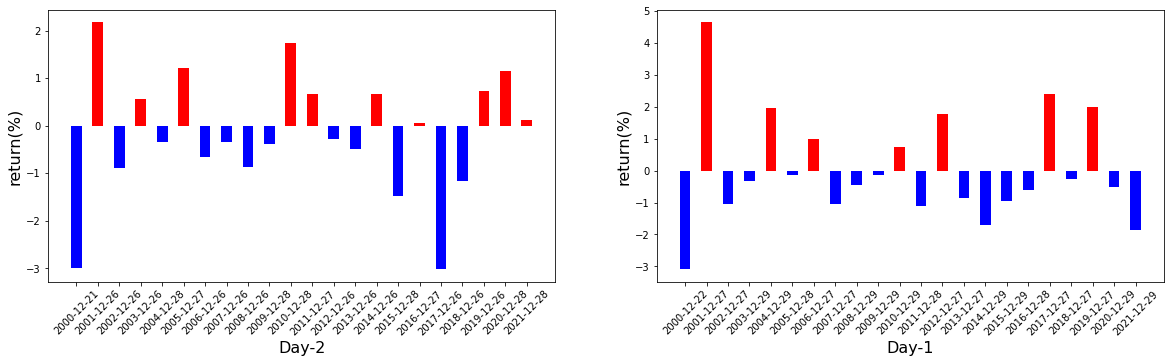

In [ ]:
label = ret_day_minus_2['대주주기준일-2']
index = np.arange(len(label))

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
plt.bar(index, ret_day_minus_2['등락률(Day-2)'], width = 0.5, color=[  'red' if x_return > 0 else 'blue' for x_return in list(ret_day_minus_2['등락률(Day-2)']) ] )
plt.ylabel('return(%)', fontsize = 16)
plt.xlabel('Day-2', fontsize = 16)
plt.xticks(index, label, fontsize = 10, rotation = 45)

label = ret_day_minus_1['대주주기준일-1']
index = np.arange(len(label))

plt.subplot(1,2,2)
plt.bar(index, ret_day_minus_1['등락률(Day-1)'], width = 0.5, color=[ 'red' if x_return > 0 else 'blue' for x_return in list(ret_day_minus_1['등락률(Day-1)']) ])
plt.ylabel('return(%)', fontsize = 16)
plt.xlabel('Day-1', fontsize = 16)
plt.xticks(index, label, fontsize = 10, rotation = 45)
plt.show()